# Labs Challenge Data Visualization

Mr. James adalah seorang data analyst suatu perusahan retail di US. Saat ini Mr. James diberikan tugas untuk membuat report data order dan customer dari perusahaan dengan rentang waktu 2018-2021 untuk ditampikan dalam rapat akhir tahun BOD. Mr. James sudah merumuskan beberapa pertanyaan dan apa yang ingin dia tampilkan. Bantulah Mr. James untuk menjawab pertanyaan dengan data visualisasi menggunakan python (matplotlib, seaborn, atau lainnya).

![Store](https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/NBC_Superstore.png/375px-NBC_Superstore.png)

### Beberapa insights yang Mr. James ingin tampilkan

1. Bagaimana Grafik Sales dari Tahun ke tahun? Apakah mengalami tren positif atau negatif?
2. Tampilkan juga grafik Sales dengan domain bulan.
3. Bagaimana distribusi nilai dari Penjualan dan Profit pada Tahun 2019?
4. Siapakah Customer dengan Pembelian terbanyak secara frekuensi order selama 4 Tahun? (Tampilkan 5 teratas)
5. Siapakah Customer dengan Pembelian terbanyak secara monetary atau nominal selama 4 Tahun? (Tampilkan 5 Teratas)
6. Siapakah 5 Customer yang paling banyak menerima diskon secara rata-rata nominal percentage?
7. Negara bagian apa yang paling rendah dari segi profit maupun Sales? (Tampilkan 3 data teratas)
8. Bagaimana kondisi discount pada 3 negara bagian tersebut?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

## Nomor 1

In [2]:
df = pd.read_excel('data/Superstore.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [4]:
# Create new columns
df['year'] = df['Order Date'].dt.year

In [5]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,year
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015


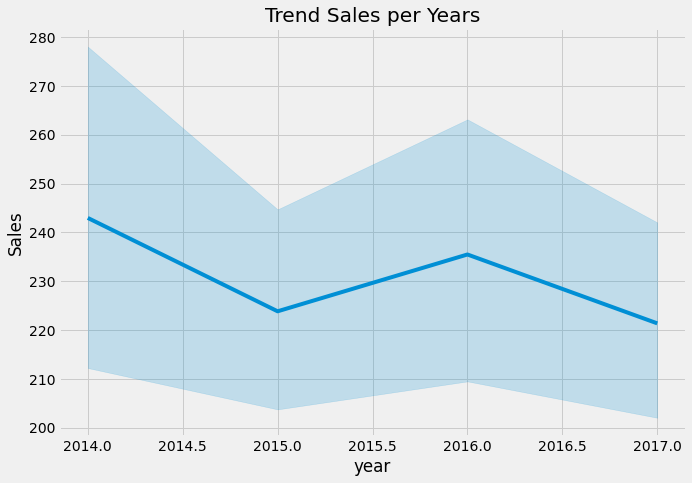

In [6]:
plt.figure(figsize=(10, 7))
sns.lineplot(data=df, x='year', y='Sales')
plt.title('Trend Sales per Years')
plt.show()

## Nomor 2

In [7]:
# Create month of order date
df['month'] = df['Order Date'].dt.month

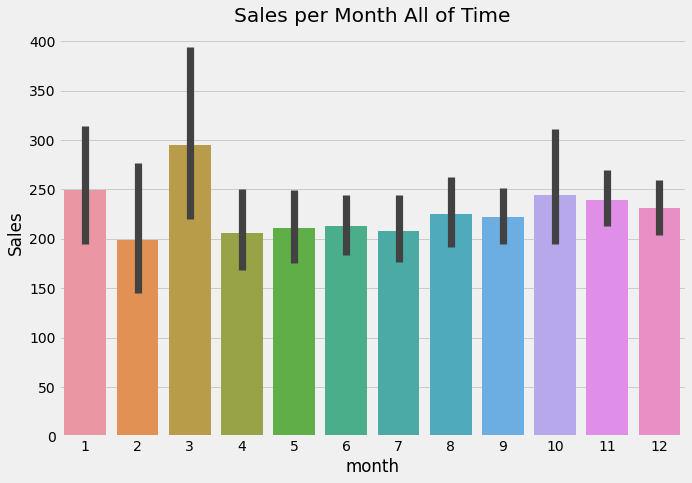

In [8]:
plt.figure(figsize=(10, 7))
sns.barplot(data=df, x='month', y='Sales')
plt.title('Sales per Month All of Time')
plt.show()

## Nomor 3

In [9]:
# Filter data for 2017 only
df2017 = df[df['year'] == 2017]
df2017.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,year,month
12,13,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,...,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,3,0.2,5.4432,2017,4
23,24,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.372,2,0.3,-1.0196,2017,7
34,35,CA-2017-107727,2017-10-19,2017-10-23,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,...,OFF-PA-10000249,Office Supplies,Paper,Easy-staple paper,29.472,3,0.2,9.9468,2017,10
41,42,CA-2017-120999,2017-09-10,2017-09-15,Standard Class,LC-16930,Linda Cazamias,Corporate,United States,Naperville,...,TEC-PH-10004093,Technology,Phones,Panasonic Kx-TS550,147.168,4,0.2,16.5564,2017,9
43,44,CA-2017-139619,2017-09-19,2017-09-23,Standard Class,ES-14080,Erin Smith,Corporate,United States,Melbourne,...,OFF-ST-10003282,Office Supplies,Storage,"Advantus 10-Drawer Portable Organizer, Chrome ...",95.616,2,0.2,9.5616,2017,9


Sales

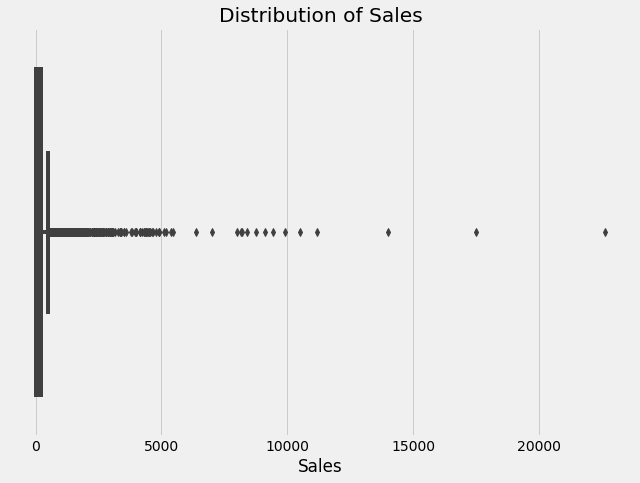

In [10]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x='Sales')
plt.title('Distribution of Sales')
plt.show()

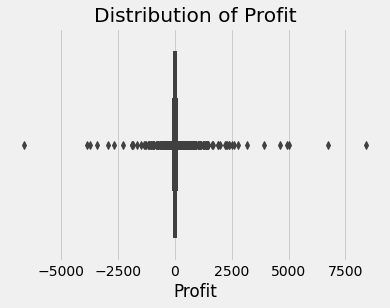

In [11]:
sns.boxplot(data=df, x='Profit')
plt.title('Distribution of Profit')
plt.show()

## Nomor 4

In [12]:
top5_customer = df.groupby('Customer Name')['Order ID'].nunique().sort_values(ascending=False).head().reset_index()
top5_customer

,Customer Name,Order ID
0,Emily Phan,17
1,Patrick Gardner,13
2,Chloris Kastensmidt,13
3,Sally Hughsby,13
4,Joel Eaton,13


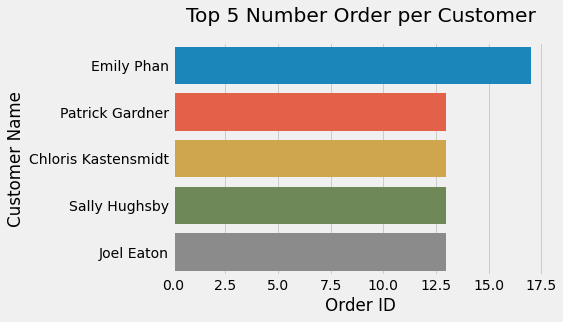

In [13]:
sns.barplot(data=top5_customer, y='Customer Name', x='Order ID')
plt.title('Top 5 Number Order per Customer', pad=20)
plt.show()

## Nomor 5

In [14]:
top5_customer_sales = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head().reset_index()
top5_customer_sales

,Customer Name,Sales
0,Sean Miller,25043.050
1,Tamara Chand,19052.218
2,Raymond Buch,15117.339
3,Tom Ashbrook,14595.620
4,Adrian Barton,14473.571


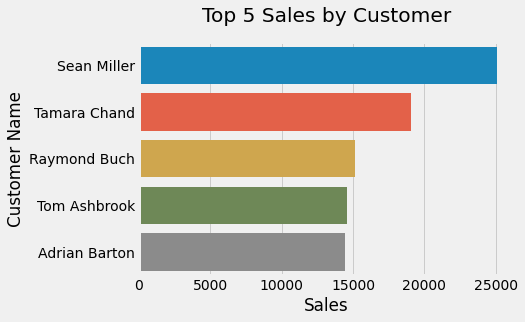

In [15]:
sns.barplot(data=top5_customer_sales, y='Customer Name', x='Sales')
plt.title('Top 5 Sales by Customer', pad=20)
plt.show()

## Nomor 6

In [16]:
top5_customer_disc = df.groupby('Customer Name')['Discount'].mean().sort_values(ascending=False).head().reset_index()
top5_customer_disc

,Customer Name,Discount
0,Thais Sissman,0.700000
1,Ritsa Hightower,0.533333
2,Vivek Sundaresam,0.475000
3,Gene Hale,0.466667
4,Lisa Hazard,0.466667


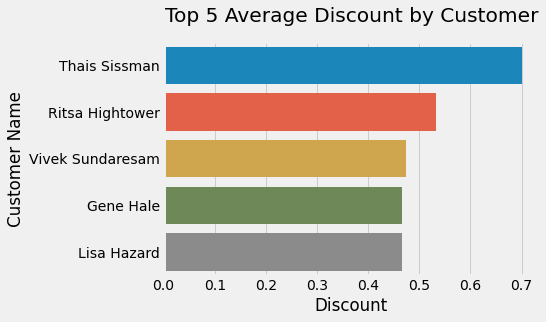

In [17]:
sns.barplot(data=top5_customer_disc, y='Customer Name', x='Discount')
plt.title('Top 5 Average Discount by Customer', pad=20)
plt.show()

## Nomor 7

In [18]:
state_sales_profit = df.groupby('State').agg({'Sales':'sum', 'Profit':'sum', 'Discount':'mean'}).reset_index()

top3_state_sales = state_sales_profit[['State', 'Sales']].sort_values('Sales').head(3)
top3_state_profit = state_sales_profit[['State', 'Profit']].sort_values('Profit').head(3)

In [19]:
top3_state_sales

,State,Sales
32,North Dakota,919.910
46,West Virginia,1209.824
17,Maine,1270.530


In [20]:
top3_state_profit

,State,Profit
41,Texas,-25729.3563
33,Ohio,-16971.3766
36,Pennsylvania,-15559.9603


### Bottom 3 Sales

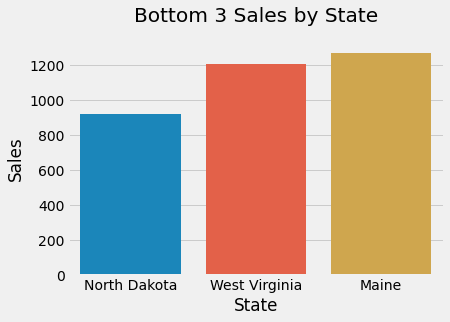

In [21]:
sns.barplot(data=top3_state_sales, x='State', y='Sales')
plt.title('Bottom 3 Sales by State', pad=20)
plt.show()

### Bottom 3 Protif

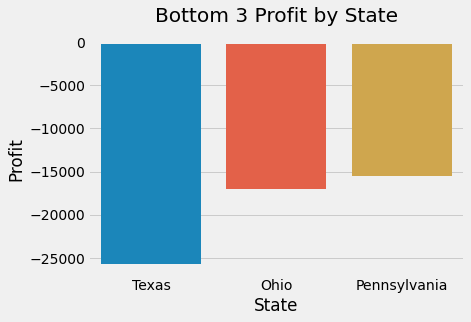

In [22]:
sns.barplot(data=top3_state_profit, x='State', y='Profit')
plt.title('Bottom 3 Profit by State', pad=20)
plt.show()

## Nomor 8

In [23]:
df_profit_less = df[df['State'].isin(['North Dakota', 'West Virginia', 'Maine'])]
df_profit_less.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,year,month
2255,2256,CA-2016-164091,2016-09-17,2016-09-22,Standard Class,LA-16780,Laura Armstrong,Corporate,United States,Bangor,...,TEC-PH-10001944,Technology,Phones,Wi-Ex zBoost YX540 Cellular Phone Signal Booster,437.85,3,0.0,131.3550,2016,9
2256,2257,CA-2016-164091,2016-09-17,2016-09-22,Standard Class,LA-16780,Laura Armstrong,Corporate,United States,Bangor,...,FUR-FU-10004952,Furniture,Furnishings,C-Line Cubicle Keepers Polyproplyene Holder w/...,109.48,2,0.0,33.9388,2016,9
4362,4363,CA-2017-111332,2017-05-20,2017-05-22,Second Class,NC-18340,Nat Carroll,Consumer,United States,Fargo,...,OFF-AR-10001953,Office Supplies,Art,Boston 1645 Deluxe Heavier-Duty Electric Penci...,131.94,3,0.0,35.6238,2017,5
4363,4364,CA-2017-111332,2017-05-20,2017-05-22,Second Class,NC-18340,Nat Carroll,Consumer,United States,Fargo,...,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",25.92,4,0.0,8.2944,2017,5
4364,4365,CA-2017-111332,2017-05-20,2017-05-22,Second Class,NC-18340,Nat Carroll,Consumer,United States,Fargo,...,OFF-ST-10003816,Office Supplies,Storage,Fellowes High-Stak Drawer Files,704.76,4,0.0,162.0948,2017,5


In [24]:
df_profit_less.groupby('State')['Discount'].mean()

State
Maine            0.000
North Dakota     0.000
West Virginia    0.075
Name: Discount, dtype: float64